# Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path=r'/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart.pkl'
print (path)
df_instacart=pd.read_pickle(path)
path2=r'/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/departments_wrangled.csv'
print(path2)
df_dep=pd.read_csv(path2, index_col=False)

/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart.pkl
/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/departments_wrangled.csv


# Price Range Groupings

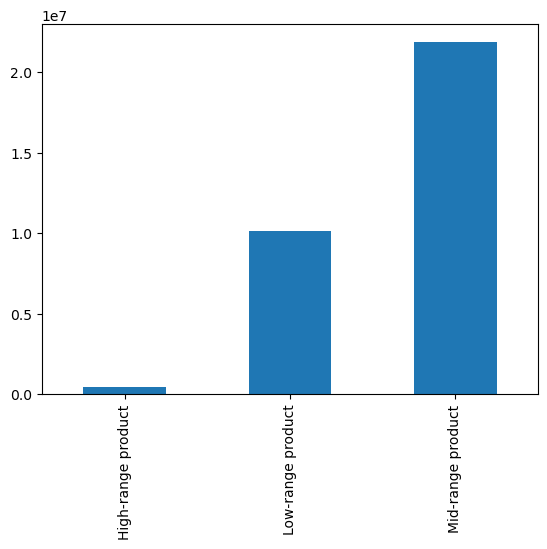

In [40]:
count_per_price_range=df_instacart['price_range_loc'].value_counts().sort_index().plot.bar()

In [ ]:
count_per_price_range.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/price_range_groupings_bar.png'))

In [12]:
#count of items in each department per price range
ct_1= pd.crosstab(df_instacart['price_range_loc'], df_instacart['department_name'])

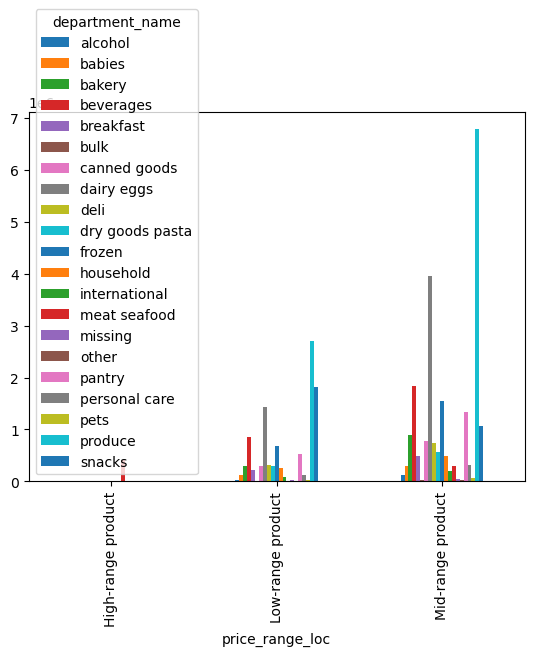

In [13]:
price_range_by_dep=ct_1.sort_index().plot.bar()

In [ ]:
bar_loyalty.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/bar_loyalty.png'))

# Most Popular Products

In [10]:
#create a crosstab bewtween days_since_last_order and departments
df_instacart.loc[df_instacart['department_id']==1, 'department_name']= 'frozen'
df_instacart.loc[df_instacart['department_id']==2, 'department_name']= 'other'
df_instacart.loc[df_instacart['department_id']==3, 'department_name']= 'bakery'
df_instacart.loc[df_instacart['department_id']==4, 'department_name']= 'produce'
df_instacart.loc[df_instacart['department_id']==5, 'department_name']= 'alcohol'
df_instacart.loc[df_instacart['department_id']==6, 'department_name']= 'international'
df_instacart.loc[df_instacart['department_id']==7, 'department_name']= 'beverages'
df_instacart.loc[df_instacart['department_id']==8, 'department_name']= 'pets'
df_instacart.loc[df_instacart['department_id']==9, 'department_name']= 'dry goods pasta'
df_instacart.loc[df_instacart['department_id']==10, 'department_name']= 'bulk'
df_instacart.loc[df_instacart['department_id']==11, 'department_name']= 'personal care'
df_instacart.loc[df_instacart['department_id']==12, 'department_name']= 'meat seafood'
df_instacart.loc[df_instacart['department_id']==13, 'department_name']= 'pantry'
df_instacart.loc[df_instacart['department_id']==14, 'department_name']= 'breakfast'
df_instacart.loc[df_instacart['department_id']==15, 'department_name']= 'canned goods'
df_instacart.loc[df_instacart['department_id']==16, 'department_name']= 'dairy eggs'
df_instacart.loc[df_instacart['department_id']==17, 'department_name']= 'household'
df_instacart.loc[df_instacart['department_id']==18, 'department_name']= 'babies'
df_instacart.loc[df_instacart['department_id']==19, 'department_name']= 'snacks'
df_instacart.loc[df_instacart['department_id']==20, 'department_name']= 'deli'
df_instacart.loc[df_instacart['department_id']==21, 'department_name']= 'missing'

In [11]:
df_instacart.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'merge_check_ords', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_prior_order_check', 'price_range_loc', 'busiest_days',
       'busy_order_times', 'busiest_period_of_the_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag',
       'med_of_days_since_last_order', 'order_freq_flag', '_merge', 'region',
       'activity_flag', 'profile', 'department_name'],
      dtype='object')

In [14]:
product_popularity=df_instacart.groupby('department_name').days_since_last_order.mean()

In [24]:
print(product_popularity)

department_name
alcohol            10.340887
babies             10.004465
bakery             11.097613
beverages          11.053389
breakfast          11.296101
bulk               10.104230
canned goods       11.656079
dairy eggs         10.986054
deli               11.345655
dry goods pasta    11.774450
frozen             11.730829
household          11.996490
international      11.291251
meat seafood       11.432021
missing            10.218559
other              10.952867
pantry             11.163256
personal care      11.593145
pets               11.867322
produce            10.856212
snacks             10.947879
Name: days_since_last_order, dtype: float64


<Axes: xlabel='department_name'>

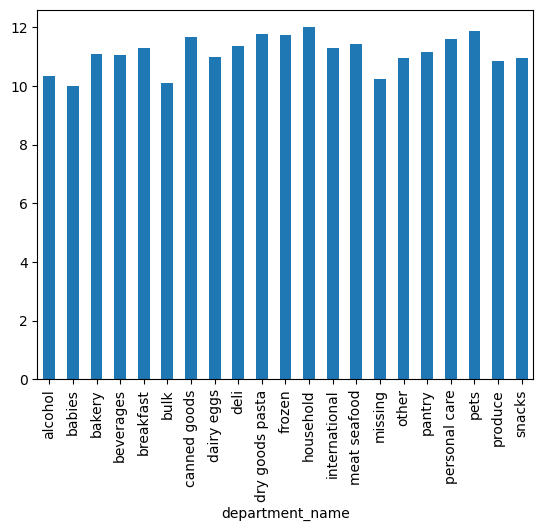

In [22]:
product_popularity.plot.bar()

# Customers and Ordering Behavior

In [25]:
#how often each type of customer returns to instacart
user_return=df_instacart.groupby('loyalty_flag').days_since_last_order.mean()

In [27]:
user_return

loyalty_flag
Loyal customer       6.026656
New customer        17.976936
Regular customer    12.155135
Name: days_since_last_order, dtype: float64

<Axes: xlabel='loyalty_flag'>

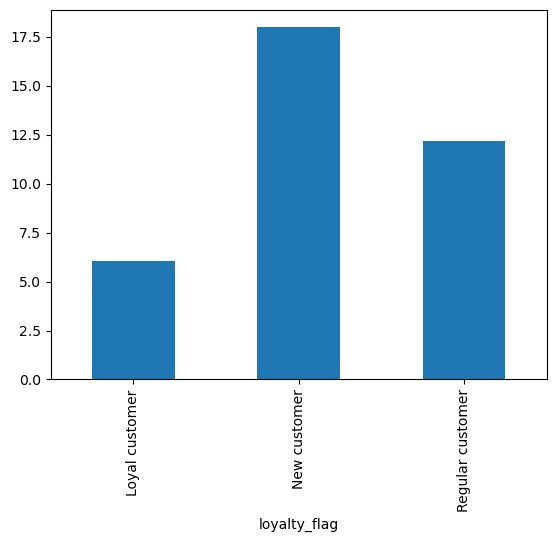

In [28]:
user_return.plot.bar()

# Customer Loyalty Type and Frequency of Orders

In [30]:
df_instacart.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'merge_check_ords', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_prior_order_check', 'price_range_loc', 'busiest_days',
       'busy_order_times', 'busiest_period_of_the_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag',
       'med_of_days_since_last_order', 'order_freq_flag', '_merge', 'region',
       'activity_flag', 'profile', 'department_name'],
      dtype='object')

In [33]:
#create a stacked bar graph
df_customer_order_freq=df_instacart.groupby('loyalty_flag').order_freq_flag.value_counts()


In [39]:
df_customer_order_freq

loyalty_flag      order_freq_flag      
Loyal customer    Frequent customer        10279960
                  Regular customer             4133
New customer      Non-frequent customer     2724962
                  Regular customer          1870352
                  Frequent customer         1648671
Regular customer  Frequent customer         9631222
                  Regular customer          5334079
                  Non-frequent customer      911475
Name: order_freq_flag, dtype: int64

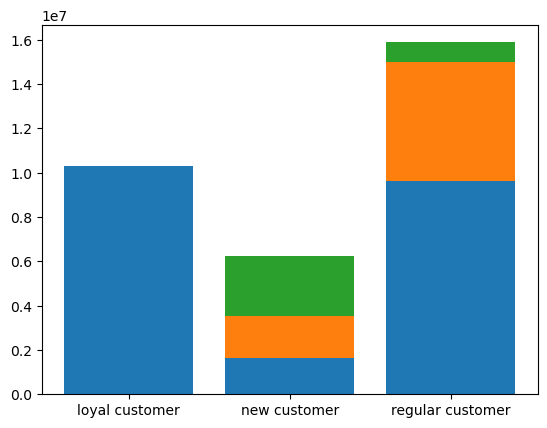

In [81]:
#create a stack bar
x=['loyal customer', 'new customer', 'regular customer']
frequent_customers=[10279960, 1648671, 9631222]
regular_customers=[4133, 1870352, 5334079]
nonfrequent_customers=[0, 2724962, 911475]

fig, ax=plt.subplots()

ax.bar(x, frequent_customers)
ax.bar (x, regular_customers, bottom=frequent_customers)
ax.bar (x, nonfrequent_customers, bottom=np.add(frequent_customers, regular_customers))

plt.show()

<Axes: xlabel='loyalty_flag'>

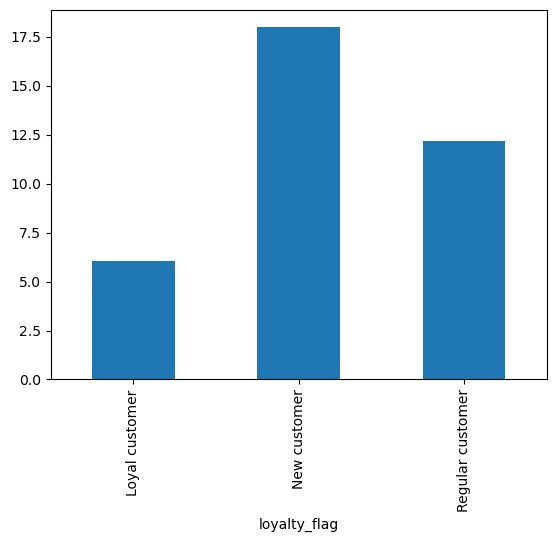

In [145]:
loyalty_habit=df_instacart.groupby('loyalty_flag').days_since_last_order.mean()
loyalty_habit.plot.bar()

# Customer's Ordering Habits Per Region

In [68]:
df_instacart.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'merge_check_ords', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_prior_order_check', 'price_range_loc', 'busiest_days',
       'busy_order_times', 'busiest_period_of_the_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag',
       'med_of_days_since_last_order', 'order_freq_flag', '_merge', 'region',
       'activity_flag', 'profile', 'department_name', 'babies_flag'],
      dtype='object')

In [58]:
#Create a df for each region
df_r1= df_instacart.loc[df_instacart['region']==1]
df_r2=df_instacart.loc[df_instacart['region']==2]
df_r3=df_instacart.loc[df_instacart['region']==3]
df_r4=df_instacart.loc[df_instacart['region']==4]

In [148]:
#Create four graphs shouwing the frequency of orders placed during each day of the week
#region 1
r1_dow=df_r1.groupby('order_day_of_week').order_day_of_week.count()

<Axes: xlabel='order_day_of_week'>

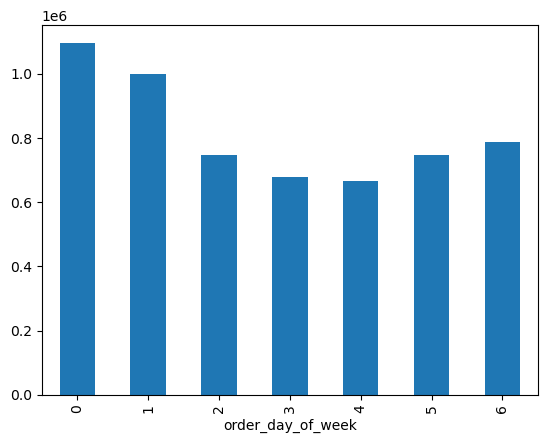

In [149]:
r1_dow.plot.bar()

<Axes: xlabel='order_day_of_week'>

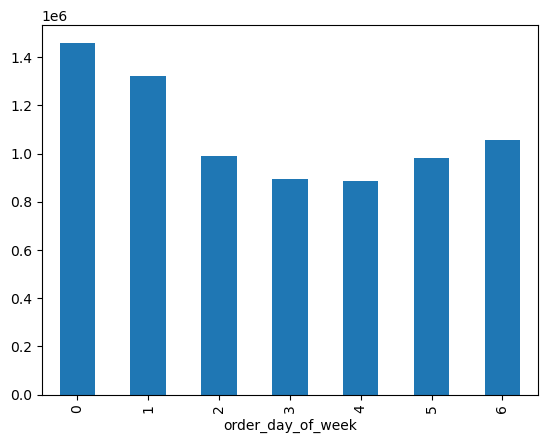

In [65]:
#region 2
r2_dow=df_r2.groupby('order_day_of_week').order_day_of_week.count()
r2_dow.plot.bar()

<Axes: xlabel='order_day_of_week'>

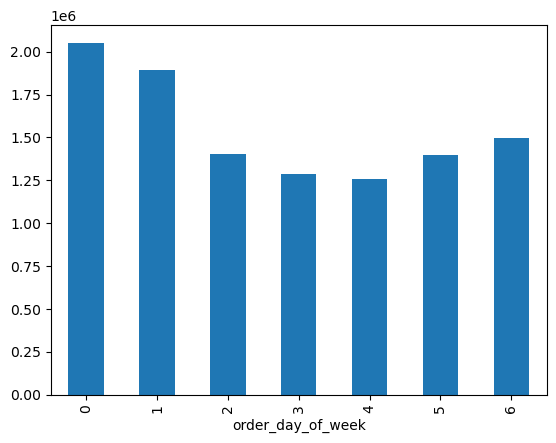

In [66]:
#region 3
r3_dow=df_r3.groupby('order_day_of_week').order_day_of_week.count()
r3_dow.plot.bar()

<Axes: xlabel='order_day_of_week'>

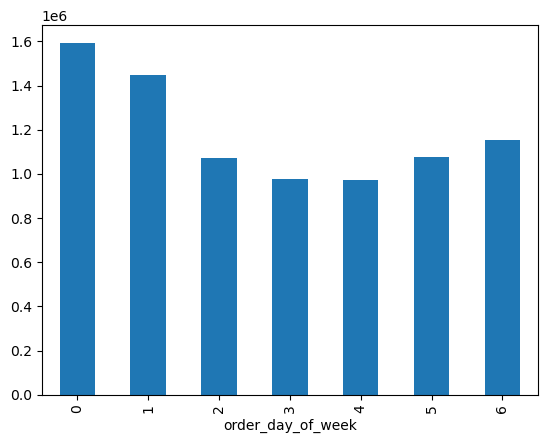

In [67]:
#region 4
r4_dow=df_r4.groupby('order_day_of_week').order_day_of_week.count()
r4_dow.plot.bar()

In [71]:
#create a crosstab to of frequent users per region
region_freq=pd.crosstab(df_instacart['region'], df_instacart['order_freq_flag'], dropna=False)

<Axes: xlabel='region'>

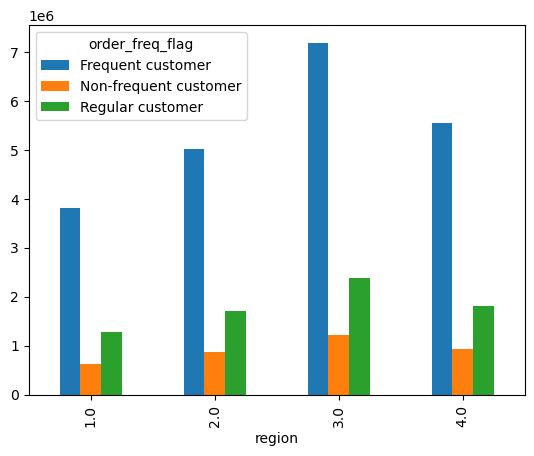

In [72]:
region_freq.plot.bar()

In [73]:
region_hour=pd.crosstab(df_instacart['order_hour_of_day'], df_instacart['region'], dropna=False)

<Axes: xlabel='order_hour_of_day'>

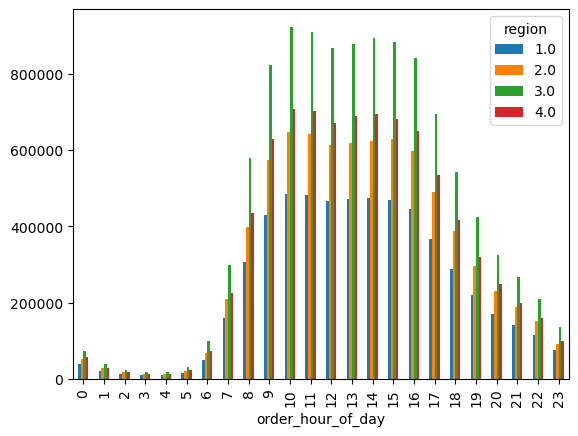

In [74]:
region_hour.plot.bar()

# Age, Family Status and Ordering Habits

In [82]:
df_instacart.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'merge_check_ords', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_prior_order_check', 'price_range_loc', 'busiest_days',
       'busy_order_times', 'busiest_period_of_the_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag',
       'med_of_days_since_last_order', 'order_freq_flag', '_merge', 'region',
       'activity_flag', 'profile', 'department_name', 'babies_flag'],
      dtype='object')

In [136]:
#drop babies_flag, accidentally created
df_instacart = df_instacart.drop('babies_flag', axis=1)


In [137]:
#age and ordering habits
#create a age category flag
df_instacart.loc[(df_instacart['age']>=18)
                       & (df_instacart['age']<40), 'age_range']='ages_18_to_40'

df_instacart.loc[(df_instacart['age']>=65), 'age_range']='ages_65plus'

df_instacart.loc[(df_instacart['age']>=40)
                       & (df_instacart['age']<65), 'age_range']='ages_40_to_65'

In [138]:
#compare frequency of days orders are placed and age range
df_age=pd.crosstab(df_instacart['age_range'], df_instacart['order_day_of_week'], dropna=False)

<Axes: xlabel='age_range'>

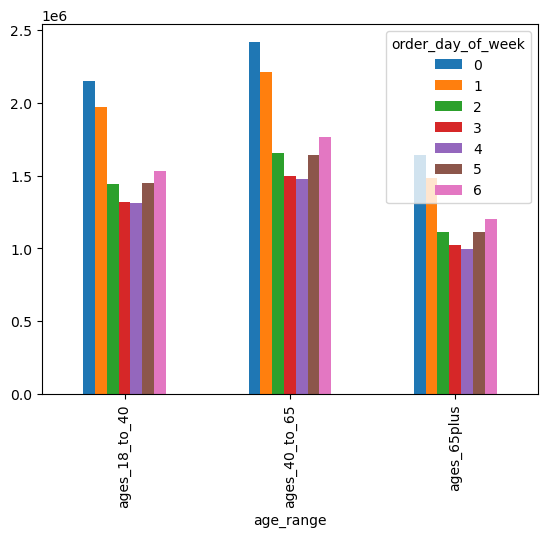

In [139]:
df_age.plot.bar()

In [140]:
#compare age range and purchases from each department 
df_age2=pd.crosstab(df_instacart['department_name'], df_instacart['age_range'], dropna=False)

<Axes: xlabel='department_name'>

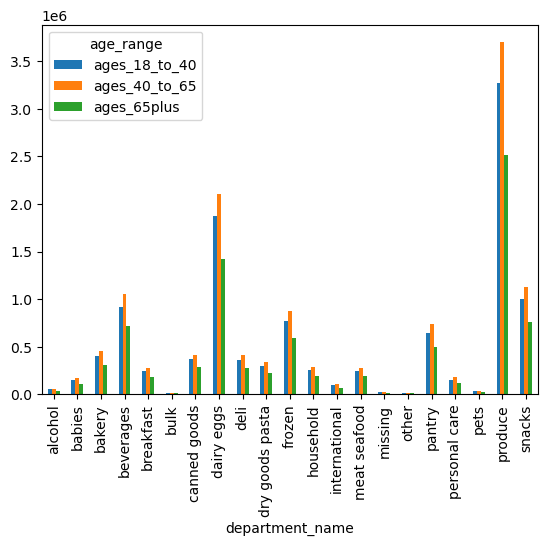

In [141]:
df_age2.plot.bar()

<Axes: xlabel='order_hour_of_day'>

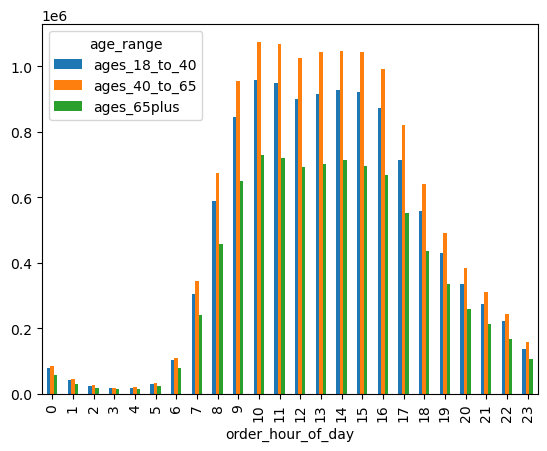

In [142]:
#age and order_hour_of_day
df_age3=pd.crosstab(df_instacart['order_hour_of_day'], df_instacart['age_range'], dropna=False)
df_age3.plot.bar()

In [111]:
#family and ordering habits

<Axes: xlabel='department_name'>

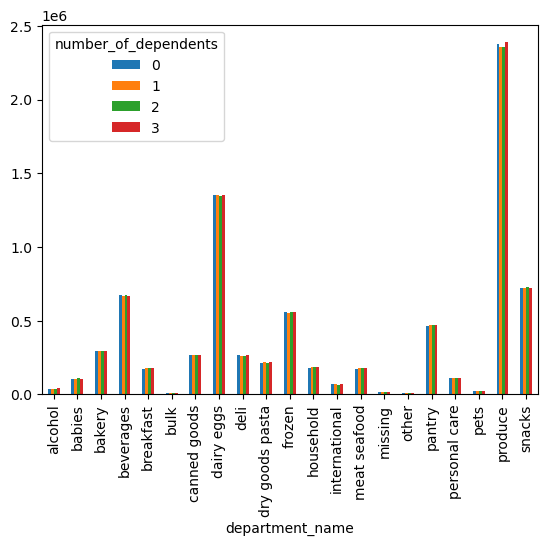

In [118]:
df_family=pd.crosstab(df_instacart['department_name'], df_instacart['number_of_dependents'], dropna=False)
df_family.plot.bar()

# Demographic Counts

In [120]:
#proportion of users with 0,1,2 or three number of dependents 
df_demo=df_instacart.groupby('number_of_dependents').number_of_dependents.count()

In [121]:
df_demo

number_of_dependents
0    8097503
1    8081104
2    8091143
3    8135109
Name: number_of_dependents, dtype: int64

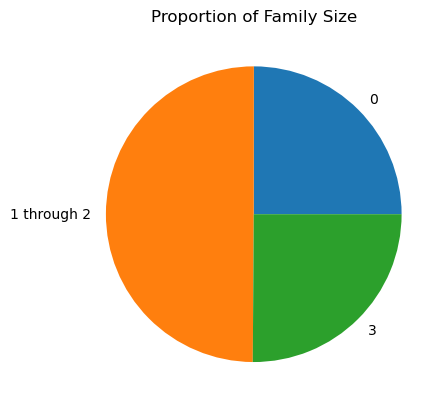

In [131]:
#create a pie chart with a max of three variables
labels=[0,'1 through 2',3]
sizes= [8097503, 16172247, 8135109]
fig, ax=plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title('Proportion of Family Size')
plt.show()

In [143]:
#age range count
df_family=df_instacart.groupby('age_range').age_range.count()

<Axes: xlabel='age_range'>

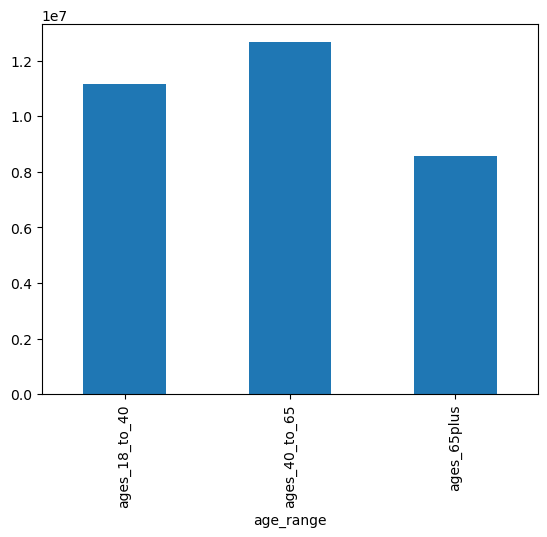

In [144]:
df_family.plot.bar()